# Dimensional Reduction

## HW : Use PCA to reduce dimension of Iris dataset from 4 to 2. Make visualization for the result.


### Data

In [62]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_labeled = pd.read_csv("Iris.csv")

In [31]:
data_labeled

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
set(data_labeled['Species'])

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [20]:
data = data_labeled[data_labeled.columns[1:5]]

In [21]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Dimension reduction (sikitlearn)

In [25]:
pca = PCA(n_components=2)
data_2=pca.fit_transform(data)

In [90]:
def visualize_iris(component,label):
    v1 = []
    v2 = []
    v3 = []

    for k,i in enumerate(label):
        if i == 'Iris-virginica':
            v1.append(component[k])
        elif i == 'Iris-setosa':
            v2.append(component[k])
        elif i == 'Iris-versicolor':
            v3.append(component[k])
        
    v1 = np.array(v1)
    v2 = np.array(v2)
    v3 = np.array(v3)
    return v1,v2,v3

In [91]:
v1,v2,v3 = visualize_iris(data_2,data_labeled["Species"])

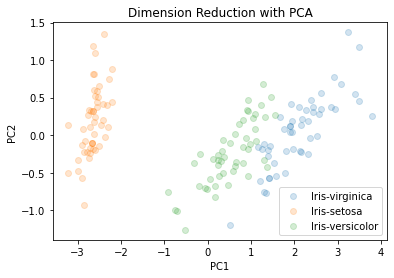

In [92]:
plt.scatter(v1[:,0],v1[:,1],alpha=0.2,label='Iris-virginica')
plt.scatter(v2[:,0],v2[:,1],alpha=0.2,label='Iris-setosa')
plt.scatter(v3[:,0],v3[:,1],alpha=0.2,label='Iris-versicolor')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Dimension Reduction with PCA')
plt.legend()


## Dimension reduction (from scatch)

In [103]:
from numpy import linalg as LA

In [104]:
data_array = np.array(data)

In [111]:
data_array = data_array - np.mean(data_array,axis=0)

In [112]:
w, v = LA.eig(data.T@data)

In [113]:
w

array([9.20653060e+03, 3.14103073e+02, 1.20360193e+01, 3.53031167e+00])

In [116]:
v[:,0:2]

array([[ 0.75116805,  0.28583096],
       [ 0.37978837,  0.54488976],
       [ 0.51315094, -0.70889874],
       [ 0.16787934, -0.34475845]])

In [120]:
X_reduced = np.dot(v[:,0:2].T,data_array.T).T

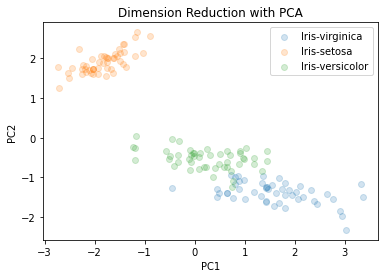

In [121]:
v1,v2,v3 = visualize_iris(X_reduced,data_labeled["Species"])
plt.scatter(v1[:,0],v1[:,1],alpha=0.2,label='Iris-virginica')
plt.scatter(v2[:,0],v2[:,1],alpha=0.2,label='Iris-setosa')
plt.scatter(v3[:,0],v3[:,1],alpha=0.2,label='Iris-versicolor')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Dimension Reduction with PCA')
plt.legend()

## variance

In [126]:
print("Sikitlearn")
print("Explained variance of each pc is",pca.explained_variance_ratio_)

Sikitlearn
Explained variance of each pc is [0.92461621 0.05301557]


In [125]:
print("My Code")
print("Explained variance of each pc is",w[0]/np.sum(w),w[1]/np.sum(w))

My Code
Explained variance of each pc is 0.9654296885622256 0.032937970357246625


## Classification (Logistic Regression)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(data_2, data_labeled["Species"], test_size=0.33, random_state=42)

In [73]:
cls = LogisticRegression() 
cls.fit(X_train, y_train)
predictions = cls.predict(X_test)

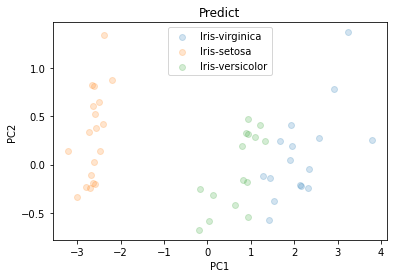

In [96]:
#predictions


v1,v2,v3 = visualize_iris(X_test,predictions)

plt.scatter(v1[:,0],v1[:,1],alpha=0.2,label='Iris-virginica')
plt.scatter(v2[:,0],v2[:,1],alpha=0.2,label='Iris-setosa')
plt.scatter(v3[:,0],v3[:,1],alpha=0.2,label='Iris-versicolor')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Predict')
plt.legend()



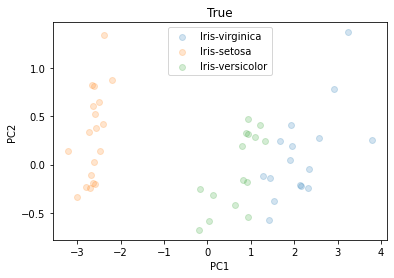

In [97]:
#predictions



v1,v2,v3 = visualize_iris(X_test,y_test)




plt.scatter(v1[:,0],v1[:,1],alpha=0.2,label='Iris-virginica')
plt.scatter(v2[:,0],v2[:,1],alpha=0.2,label='Iris-setosa')
plt.scatter(v3[:,0],v3[:,1],alpha=0.2,label='Iris-versicolor')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('True')
plt.legend()




In [74]:
from sklearn.metrics import accuracy_score

In [102]:
print("the fraction of correctly classified sample is",accuracy_score(y_test, predictions))
print("100 %")
print(":)")

the fraction of correctly classified sample is 1.0
100 %
:)
